In [69]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import pprint
from datetime import datetime
from citipy import citipy
from config import weather_api_key
import time
import csv

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [47]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
coordinates = list(lat_lngs)

In [42]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

589

In [43]:
base_url = f'https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=imperial'

In [54]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = base_url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | mnogovershinnyy
Processing Record 7 of Set 1 | dutse
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | caravelas
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | hede
Processing Record 13 of Set 1 | egvekinot
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | marcona
City not found. Skipping...
Processing Record 17 of Set 1 | muswellbrook
Processing Record 18 of Set 1 | murree
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | neiafu
Processing Record 21 of Set 1 | albany
Processing Re

Processing Record 35 of Set 4 | ribeira grande
Processing Record 36 of Set 4 | chara
Processing Record 37 of Set 4 | ilulissat
Processing Record 38 of Set 4 | lata
Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | korla
Processing Record 41 of Set 4 | arraial do cabo
Processing Record 42 of Set 4 | laem sing
Processing Record 43 of Set 4 | rio grande
Processing Record 44 of Set 4 | phan rang
City not found. Skipping...
Processing Record 45 of Set 4 | hutchinson
Processing Record 46 of Set 4 | launceston
Processing Record 47 of Set 4 | salinopolis
Processing Record 48 of Set 4 | ossora
Processing Record 49 of Set 4 | aksay
Processing Record 50 of Set 4 | coxim
Processing Record 1 of Set 5 | sinnamary
Processing Record 2 of Set 5 | loandjili
Processing Record 3 of Set 5 | nuuk
Processing Record 4 of Set 5 | zelenoborsk
Processing Record 5 of Set 5 | salekhard
Processing Record 6 of Set 5 | van
Processing Record 7 of Set 5 | bengkulu
Processing Record 8 of Set 5 | h

Processing Record 24 of Set 8 | linxia
Processing Record 25 of Set 8 | gamba
Processing Record 26 of Set 8 | oranjestad
Processing Record 27 of Set 8 | pevek
Processing Record 28 of Set 8 | jawhar
Processing Record 29 of Set 8 | lolua
City not found. Skipping...
Processing Record 30 of Set 8 | walvis bay
Processing Record 31 of Set 8 | tolaga bay
Processing Record 32 of Set 8 | botshabelo
Processing Record 33 of Set 8 | kavieng
Processing Record 34 of Set 8 | pangnirtung
Processing Record 35 of Set 8 | dudinka
Processing Record 36 of Set 8 | ballina
Processing Record 37 of Set 8 | saint-pierre
Processing Record 38 of Set 8 | starkville
Processing Record 39 of Set 8 | villeneuve-sur-lot
Processing Record 40 of Set 8 | abalak
Processing Record 41 of Set 8 | rawlins
Processing Record 42 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 8 | chicama
Processing Record 44 of Set 8 | victoria
Processing Record 45 of Set 8 | tiruvottiyur
City not found. Skipping...
Pr

Processing Record 14 of Set 12 | syamzha
Processing Record 15 of Set 12 | artyom
Processing Record 16 of Set 12 | sinkat
City not found. Skipping...
Processing Record 17 of Set 12 | aranos
Processing Record 18 of Set 12 | suao
City not found. Skipping...
Processing Record 19 of Set 12 | iquitos
Processing Record 20 of Set 12 | banjarmasin
Processing Record 21 of Set 12 | san rafael
Processing Record 22 of Set 12 | zyryanovskiy
City not found. Skipping...
Processing Record 23 of Set 12 | loukhi
Processing Record 24 of Set 12 | takikawa
Processing Record 25 of Set 12 | mildura
Processing Record 26 of Set 12 | porto novo
Processing Record 27 of Set 12 | samarai
Processing Record 28 of Set 12 | martinsburg
Processing Record 29 of Set 12 | amos
Processing Record 30 of Set 12 | qasigiannguit
Processing Record 31 of Set 12 | uruacu
Processing Record 32 of Set 12 | sembakung
Processing Record 33 of Set 12 | rujewa
Processing Record 34 of Set 12 | lasa
Processing Record 35 of Set 12 | bo phloi


In [55]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,55.94,72,0,13.80,AR,2022-08-11 14:44:04
1,Jamestown,42.0970,-79.2353,72.01,55,0,12.66,US,2022-08-11 14:42:45
2,Mataura,-46.1927,168.8643,28.40,97,8,2.33,NZ,2022-08-11 14:44:05
3,Saskylakh,71.9167,114.0833,44.80,61,100,9.22,RU,2022-08-11 14:44:05
4,Lagoa,39.0500,-27.9833,72.25,76,65,8.81,PT,2022-08-11 14:44:06
5,Mnogovershinnyy,53.9353,139.9242,52.97,99,100,1.95,RU,2022-08-11 14:44:07
6,Dutse,11.7594,9.3392,82.63,59,100,5.30,NG,2022-08-11 14:44:08
7,Rikitea,-23.1203,-134.9692,72.70,71,70,22.10,PF,2022-08-11 14:42:04
8,Caravelas,-17.7125,-39.2481,84.29,39,85,7.78,BR,2022-08-11 14:44:08
9,Vaini,-21.2000,-175.2000,71.76,94,75,8.05,TO,2022-08-11 14:44:09


In [56]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2022-08-11 14:44:04,-38.0023,-57.5575,55.94,72,0,13.80
1,Jamestown,US,2022-08-11 14:42:45,42.0970,-79.2353,72.01,55,0,12.66
2,Mataura,NZ,2022-08-11 14:44:05,-46.1927,168.8643,28.40,97,8,2.33
3,Saskylakh,RU,2022-08-11 14:44:05,71.9167,114.0833,44.80,61,100,9.22
4,Lagoa,PT,2022-08-11 14:44:06,39.0500,-27.9833,72.25,76,65,8.81
...,...,...,...,...,...,...,...,...,...
533,Bo Phloi,TH,2022-08-11 15:00:36,14.3236,99.5161,77.14,79,100,8.72
534,Luwuk,ID,2022-08-11 15:00:37,-0.9516,122.7875,77.56,90,42,1.30
535,Brownsville,US,2022-08-11 15:00:02,25.9018,-97.4975,87.98,75,50,1.99
536,Wanning,CN,2022-08-11 15:00:38,18.8003,110.3967,80.15,89,100,2.98


In [61]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [62]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

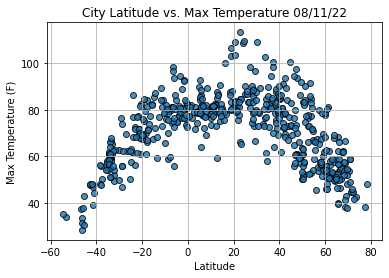

In [64]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

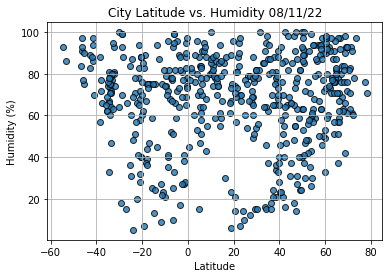

In [65]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

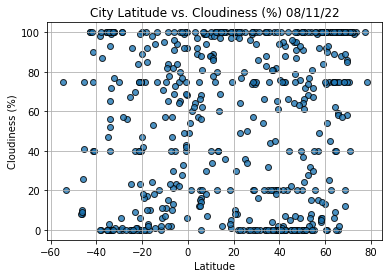

In [66]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

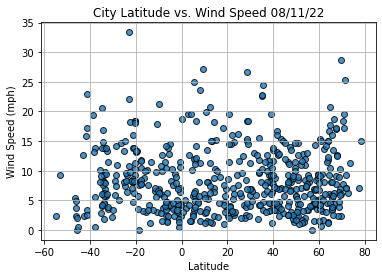

In [67]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [71]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [73]:
index13 = city_data_df.loc[13]
index13

City                 Constitucion
Country                        CL
Date          2022-08-11 14:44:12
Lat                      -35.3333
Lng                      -72.4167
Max Temp                    54.46
Humidity                       62
Cloudiness                      0
Wind Speed                   2.84
Name: 13, dtype: object

In [76]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

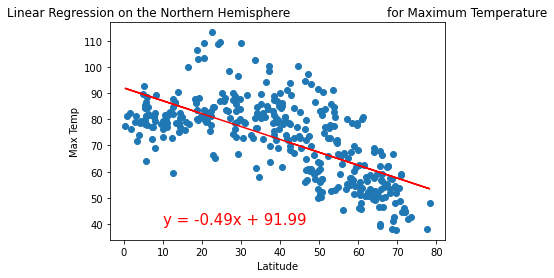

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

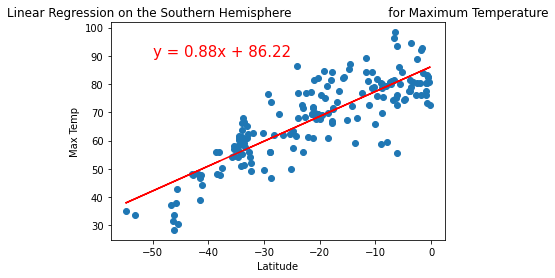

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

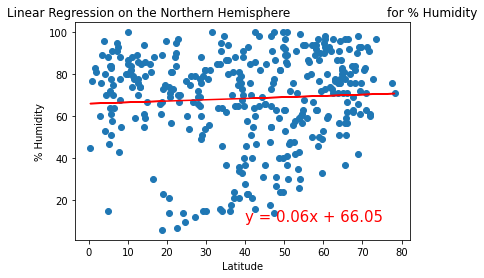

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

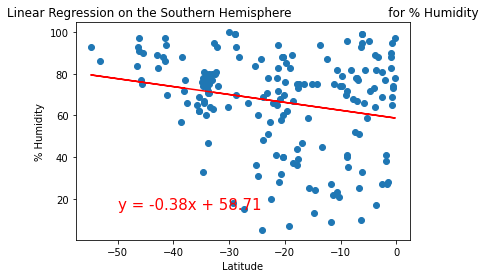

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

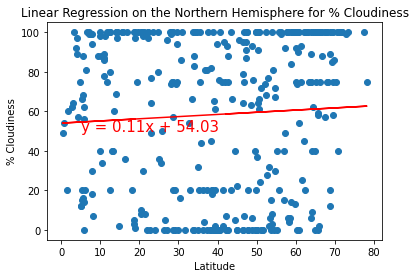

In [103]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(5,50))

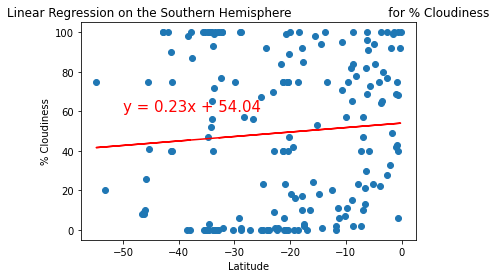

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

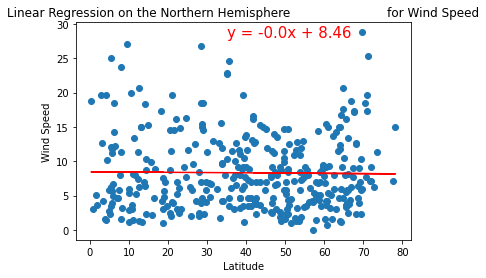

In [118]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed','Wind Speed',(35,28))

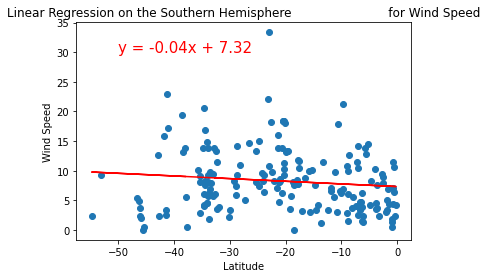

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))